In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
col_list = [i for i in range(1, 20)]
data = pd.read_csv('all_data.csv', usecols = col_list)
data.drop(columns = ['label'], inplace = True)
data.head()

,text,Label_by_zihan,Label_by_ben,Label_by_nicole,average,Qwen 1.5 Chat (0.5B),Qwen 1.5 Chat (1.8B),Qwen 1.5 Chat (4B),Qwen 1.5 Chat (7B),Qwen 1.5 Chat (14B),Qwen 1.5 Chat (72B),LLaMA-2 Chat (70B),GPT-4o,GPT-3.5 Turbo,GPT-4 Turbo,GPT-4o W/O Reasoning,Sentiment Roberta,Custmized Bert
0,what do these '1/2 naked pics' have to do with...,3.0,3.0,4.0,3.333333,1.0,3.0,1.0,6.0,3.0,3.0,3.0,3.0,3.0,5.0,2.0,3.000812,3.385936
1,OH: “I had a blue penis while I was this” [pla...,5.0,5.0,6.0,5.333333,7.0,7.0,0.0,0.0,3.0,3.0,6.0,5.0,5.0,6.0,1.0,5.122762,6.015794
2,"That's coming, but I think the victims are goi...",5.0,6.0,5.0,5.333333,7.0,5.0,2.0,5.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,4.173433,4.166149
3,I think I may be finally in with the in crowd ...,7.0,9.0,7.0,7.666667,7.0,7.0,1.0,8.0,6.0,6.0,8.0,8.0,8.0,8.0,8.0,6.907494,7.103713
4,"Wow,first Hugo Chavez and now Fidel Castro. Da...",4.0,2.0,3.0,3.000000,7.0,7.0,2.0,2.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.960894,3.268210


## EDA

- Histogram of scores


In [3]:
models = data.columns[5:]
human_rating = data['average'].values

manually set ranges for bins and all plot on the same thing ? apply to all histograms

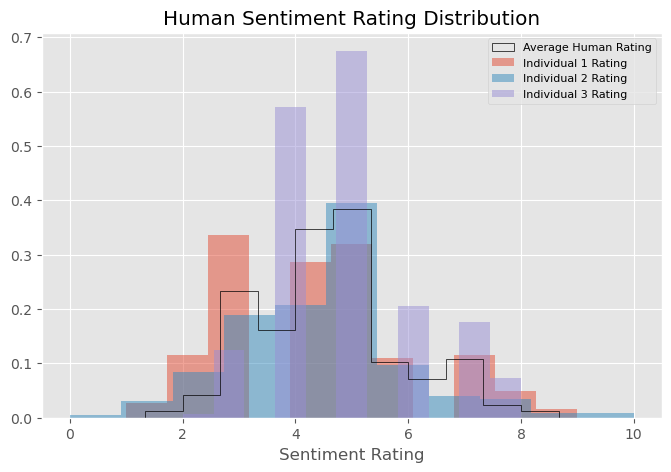

In [17]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (8, 5))
plt.hist(data['average'].values, bins = 11, density = True, histtype = 'step', color = 'black', label = 'Average Human Rating')
plt.hist(data['Label_by_zihan'].values, bins = 11, density = True, alpha = 0.5, label = 'Individual 1 Rating')
plt.hist(data['Label_by_ben'].values, bins = 11, density = True, alpha = 0.5, label = 'Individual 2 Rating')
plt.hist(data['Label_by_nicole'].values, bins = 11, density = True, alpha = 0.5, label = 'Individual 3 Rating')
plt.legend(prop = {'size': 8})
plt.xlabel('Sentiment Rating')
plt.title('Human Sentiment Rating Distribution')
plt.show()

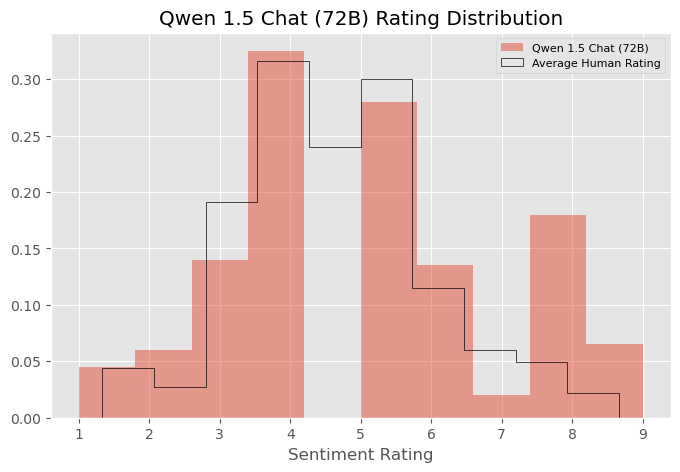

In [5]:
fig = plt.figure(figsize = (8, 5))
plt.hist(data['Qwen 1.5 Chat (72B)'].values, bins = 10, density = True, alpha = 0.5, label = 'Qwen 1.5 Chat (72B)')
plt.hist(data['average'].values, bins = 10, density = True, histtype = 'step', color = 'black', label = 'Average Human Rating')
plt.legend(prop = {'size': 8})
plt.xlabel('Sentiment Rating')
plt.title('Qwen 1.5 Chat (72B) Rating Distribution')
plt.show()

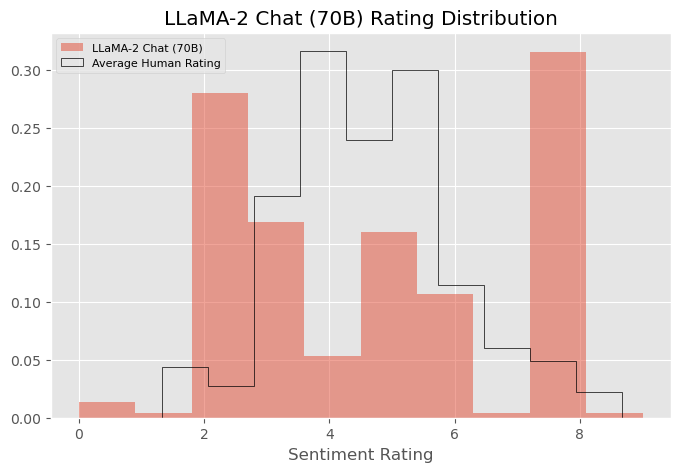

In [6]:
fig = plt.figure(figsize = (8, 5))
plt.hist(data['LLaMA-2 Chat (70B)'].values, bins = 10, density = True, alpha = 0.5, label = 'LLaMA-2 Chat (70B)')
plt.hist(data['average'].values, bins = 10, density = True, histtype = 'step', color = 'black', label = 'Average Human Rating')
plt.legend(prop = {'size': 8})
plt.xlabel('Sentiment Rating')
plt.title('LLaMA-2 Chat (70B) Rating Distribution')
plt.show()

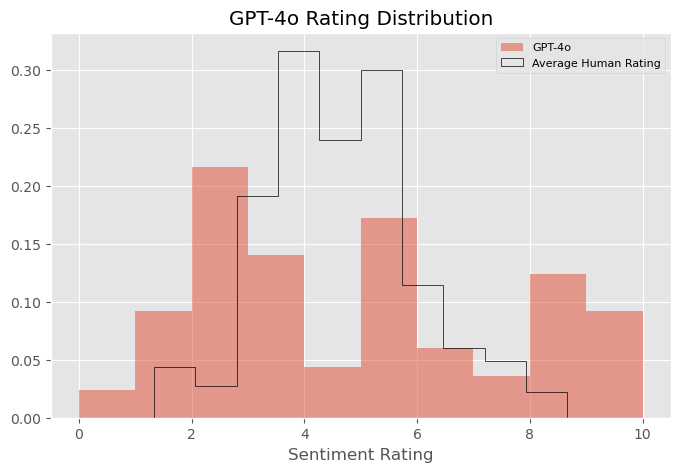

In [7]:
fig = plt.figure(figsize = (8, 5))
plt.hist(data['GPT-4o'].values, bins = 10, density = True, alpha = 0.5, label = 'GPT-4o')
plt.hist(data['average'].values, bins = 10, density = True, histtype = 'step', color = 'black', label = 'Average Human Rating')
plt.legend(prop = {'size': 8})
plt.xlabel('Sentiment Rating')
plt.title('GPT-4o Rating Distribution')
plt.show()

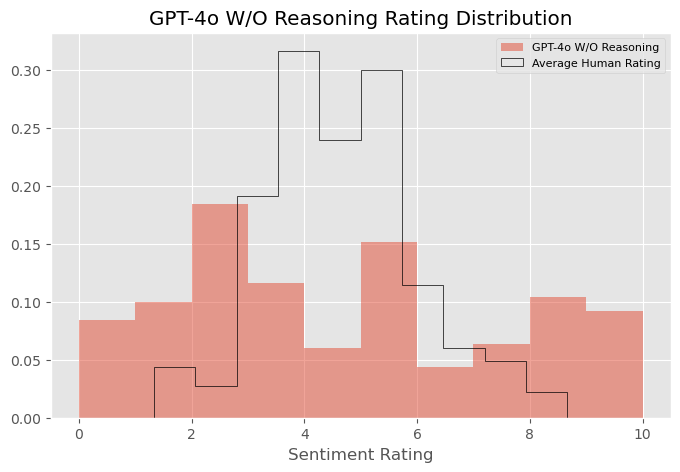

In [8]:
fig = plt.figure(figsize = (8, 5))
plt.hist(data['GPT-4o W/O Reasoning'].values, bins = 10, density = True, alpha = 0.5, label = 'GPT-4o W/O Reasoning')
plt.hist(data['average'].values, bins = 10, density = True, histtype = 'step', color = 'black', label = 'Average Human Rating')
plt.legend(prop = {'size': 8})
plt.xlabel('Sentiment Rating')
plt.title('GPT-4o W/O Reasoning Rating Distribution')
plt.show()

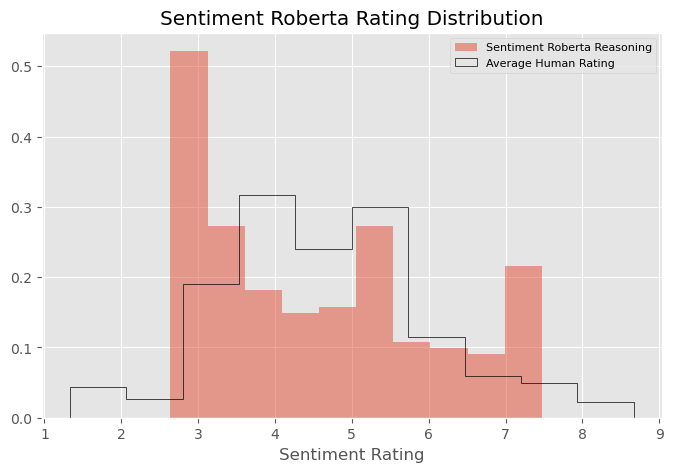

In [9]:
fig = plt.figure(figsize = (8, 5))
plt.hist(data['Sentiment Roberta'].values, bins = 10, density = True, alpha = 0.5, label = 'Sentiment Roberta Reasoning')
plt.hist(data['average'].values, bins = 10, density = True, histtype = 'step', color = 'black', label = 'Average Human Rating')
plt.legend(prop = {'size': 8})
plt.xlabel('Sentiment Rating')
plt.title('Sentiment Roberta Rating Distribution')
plt.show()

In [38]:
test_stats = np.zeros(len(models))

for i, model in enumerate(models):
    test_stats[i] = np.mean(np.abs(data[model].values - human_rating))

t = dict(zip(models, test_stats))
sorted(t, key = lambda x: x[0])

['Custmized Bert',
 'GPT-4o',
 'GPT-3.5 Turbo',
 'GPT-4 Turbo',
 'GPT-4o W/O Reasoning',
 'LLaMA-2 Chat (70B)',
 'Qwen 1.5 Chat (0.5B)',
 'Qwen 1.5 Chat (1.8B)',
 'Qwen 1.5 Chat (4B)',
 'Qwen 1.5 Chat (7B)',
 'Qwen 1.5 Chat (14B)',
 'Qwen 1.5 Chat (72B)',
 'Sentiment Roberta']

In [39]:
test_stats

array([3.568     , 2.688     , 3.16      , 2.00666667, 1.28      ,
       1.05866667, 1.36933333, 1.44266667, 1.56933333, 1.24      ,
       1.62666667, 0.62571072, 0.80296453])

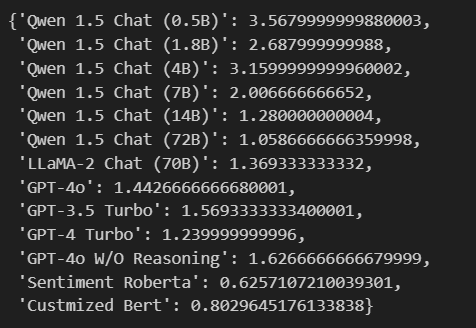

In [37]:
dict(zip(models, test_stats))

{'Qwen 1.5 Chat (0.5B)': 3.5679999999880003,
 'Qwen 1.5 Chat (1.8B)': 2.687999999988,
 'Qwen 1.5 Chat (4B)': 3.1599999999960002,
 'Qwen 1.5 Chat (7B)': 2.006666666652,
 'Qwen 1.5 Chat (14B)': 1.280000000004,
 'Qwen 1.5 Chat (72B)': 1.0586666666359998,
 'LLaMA-2 Chat (70B)': 1.369333333332,
 'GPT-4o': 1.4426666666680001,
 'GPT-3.5 Turbo': 1.5693333333400001,
 'GPT-4 Turbo': 1.239999999996,
 'GPT-4o W/O Reasoning': 1.6266666666679999,
 'Sentiment Roberta': 0.6257107239879999,
 'Custmized Bert': 0.8029645272199999}

# add in model names, sort by median

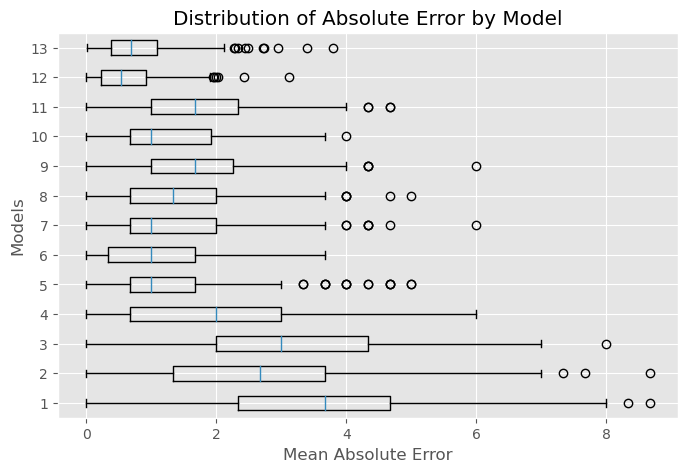

In [32]:
# data[models].values

x = np.expand_dims(human_rating, axis = 1)

fig = plt.figure(figsize = (8, 5))
plt.boxplot(abs(data[models].values - x), vert = False)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Models')
plt.title('Distribution of Absolute Error by Model')
# fig.gca().get_xaxis().set_ticks(models)
plt.show()

## Hypothesis Testing

- Take most capable LLM model and compare it against conventional 
    - Ex. Gpt or Llama or Qwen against conventional 
    - Rank LLM's by the mean absolute error across the model data (`test_stats`)
- Use two-sample hypothesis test
- Data is shifted from the scoring to absolute difference (distance) from average human rating (`|model_score - average_human_score|`)

In [12]:
test_model_ind = np.where(test_stats == min(test_stats[:-2]))[0][0]
test_model = models[test_model_ind]
test_model

'Qwen 1.5 Chat (72B)'

We want to know if conventional models or LLMs perform better. Our data will be the absolute differences (AD) between model rating and human rating 

- $X \sim N(\mu_x, \sigma_x ^2)$ and $Y \sim N(\mu_y, \sigma_y ^2)$ are both the absolute difference between model X and model Y scoring and the average human score


| Anatomy of the hypothesis test |  Answer  |
|:------------------------------:|:--------:|
| Assumption                     | $$X \sim N(\mu_x, \sigma_x ^2)$$ and $$Y \sim N(\mu_y, \sigma_y ^2)$$ |
| Population parameter           | $$\theta = \mu_x - \mu_y$$ |
| Sample statistic               | $$\hat\theta = \overline{X} - \overline{Y}$$ |
| Test statistic                 | $$T = \displaystyle\frac{\hat\theta - \theta}{\text{SE}} \sim t_{k}$$ |
| Null hypothesis                | $$H_0: \theta = 0$$ |
| Alternate hypothesis           | $$H_a: \theta > 0$$ |
| Rejection region shape         | $$(x_\alpha, \infty)$$ |

- We will use $\alpha = 0.05$

In [13]:
import scipy.stats as stats

best_llm = abs(data[test_model] - data['average'])
roberta = abs(data['Sentiment Roberta'] - data['average'])
bert = abs(data['Custmized Bert'] - data['average'])

berta_stat, berta_p = stats.ttest_ind(best_llm, roberta, alternative = 'greater')

# 'greater’: the mean of the distribution underlying the first sample is greater than the 
# mean of the distribution underlying the second sample; the llm absolute difference is greater than the
# roberta absolute difference 

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
bert_stat, bert_p = stats.ttest_ind(best_llm, bert, alternative = 'greater')

# 'greater’: the mean of the distribution underlying the first sample is greater than the 
# mean of the distribution underlying the second sample; the llm absolute difference is greater than the
# bert absolute difference 

In [33]:
def decide(alpha, p_value):
    if p_value < alpha:
        print(f'alpha = {alpha}, p_value = {p_value}')
        print('Reject null: LLMs have a larger mean -> LLMs have a larger error and a worse performance ')
    else:
        print(f'alpha = {alpha}, p_value = {p_value}')
        print('Fail to reject null: LLMs do not appear have a larger mean -> LLMs and conventional models have similar perfomances')
    
alpha = 0.05
decide(alpha, berta_p)

alpha = 0.05, p_value = 2.6596145689960566e-11
Reject null: LLMs have a larger mean -> LLMs have a larger error and a worse performance 
